# Solver for the Fresnel Maxwell-Bloch problem
### with explicit, time forward CDF
***

## Equations:

From the equations from the paper 'Symmetry breaking, dynamical pulsations, and turbulence in the transverse intensity patterns of a laser: the role played by defects' (DOI: http://dx.doi.org/10.1016/0167-2789(92)90144-C)

$\begin{cases}
\partial_t E=-k\left([f(\rho)-i.\left[\delta+\frac{1}{2}a\left[\dfrac{\nabla^2_{\bot}}{4}+1-\rho^2\right]\right]].E-2CP\right)\\
\partial_t P=-\gamma_{\bot}[(1+i\delta)P+E.D]\\
\partial_t D=-\gamma_{\parallel}(D-\chi(\rho)-\frac{1}{2}(E^*P+EP^*))
\end{cases}$


with $E=E_x+E_y$ ;  $E_x , E_y \in \mathbb{C}$ and $P=P_x+P_y$ ; $P_x , P_y \in \mathbb{C}$

Here $f(\rho)=5+4\tanh(5(\rho-\rho_0))$, where $\rho_0$ is the cavity effective width.
$a=\dfrac{8}{T}\tan^{-1}(\frac{1}{4\eta_{1}})$ and $\eta_1=\dfrac{\pi \rho^2_0}{L\lambda}$.

$\chi(\rho)=e^{(-1.2 \frac{\rho}{\rho_0})^2}\dfrac{[1+e^{-\rho_0^2}]}{[1+e^{(\rho^2-\rho_0^2)}]}$

## Gallerkin spectral method:

Galerkin BON, the Gauss-Laguerre polynomials:

$$ A_{pm}(\rho, \varphi)=2(2\rho^2)^{m/2}(\dfrac{p!}{(p+m)!})^{1/2}e^{-\rho{^2}}L_p^m(2\rho{^2})e^{im\varphi} $$

So, let $f$ be a initial condition for some variable,  $f$ can now be written in the Gauss-Laguerre space as a linear combination, by proyecting it (such as a Fourier Series):

$$f=\sum_{pm}C_{pm}A_{pm}$$

where $$C_{pm}(t)=\langle f | A_{pm}\rangle=\iint f.A_{pm}\rho \, d\!\rho d\!\varphi  $$.

Following the paper http://sci-hub.io/10.1364/JOSAB.7.001019 ..

we use the internal product  $$\langle A_{p'm'} | A_{pm}\rangle=\iint A_{p'm'}^*.A_{pm}\rho \, d\!\rho d\!\varphi=\delta_{\rho \rho'}\delta_{\varphi \varphi'}\delta_{i i'}  $$.


so, if we consider 

$\begin{cases}
 E(\rho, \varphi, t)=\sum_{pm}\psi_{pm}(t)A_{pm}, \qquad \text{with } \qquad \psi_{pm}=\iint E(t).A_{pm}\rho \, d\!\rho d\!\varphi \\
  P(\rho, \varphi, t)=\sum_{pm}p_{pm}A_{pm}, \qquad \text{with } \qquad p_{pm}=\iint P(t).A_{pm}\rho \, d\!\rho d\!\varphi \\
  D(\rho, \varphi, t)=\sum_{pm}d_{pm}A_{pm}, \qquad \text{with } \qquad d_{pm}=\iint D(t).A_{pm}\rho \, d\!\rho d\!\varphi \\
\end{cases}$

Replacing in the differential equations, and taking the internal product with $A_{p'm'}$, we arrive at (after some redefinitions)

$\begin{cases}
\partial_t \psi_{pm}=-k'\left([f(\rho)-i.\left[\delta +a+1- \rho^2 \right].\psi_{pm}-2Ck'p_{pm}\right)\\
\partial_t p_{pm}=-\gamma_{\bot}[(1+i\delta)p_{pm}+\sum\sum \Gamma (\Sigma, \Sigma, \Sigma) \psi_{pm}d_{pm}]\\
\partial_t d_{pm}=-\gamma_{\parallel}(d_{pm}-\chi(\rho)_{pm}-\sum\sum [\Gamma (\Sigma, \Sigma, \Sigma) \psi_{pm}^*p_{pm} + c.c.])
\end{cases}$

$$\Gamma (\Sigma, \Sigma, \Sigma)=\iint A_{pm}A_{p'm'}.A_{p''m''}\rho \, d\!\rho d\!\varphi  $$


In [8]:
import numpy as np
from scipy.special import binom as binom
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib
from time import localtime
from scipy.integrate import quad, dblquad

%matplotlib inline

In [13]:
txtfile=open("resolution.txt")
tempvar=txtfile.readlines()

'''resolution'''
m= int(tempvar[0].split()[1])
n= int(tempvar[1].split()[1])
i= int(tempvar[2].split()[1])
print n,m,i

rho=np.fromfile('rho.in',dtype=np.float64)
rho_dim=np.shape(rho)[0]
phi=np.fromfile('phi.in',dtype=np.float64)
phi_dim=np.shape(phi)[0]
#lm=np.fromfile('lm.in',dtype=np.float64).reshape(n,rho_dim)
#Rlm=np.fromfile('Rlm.in',dtype=np.float64).reshape(n,rho_dim)
Alm=np.fromfile('Alm.in',dtype=np.float64).reshape(n,phi_dim,rho_dim)
intensity=np.fromfile('intensity.in',dtype=np.float64).reshape(phi_dim,rho_dim)
population=np.fromfile('population.in',dtype=np.float64).reshape(phi_dim,rho_dim)

print np.shape(Alm)
#print np.shape(lm)
#print rdim
print pump

5 5 2
(5L, 500L, 1000L)
[[ 0.9999546  0.9999546  0.9999546 ...,  0.         0.9999546  0.9999546]
 [ 0.9999546  0.9999546  0.9999546 ...,  0.         0.9999546  0.9999546]
 [ 0.9999546  0.9999546  0.9999546 ...,  0.         0.9999546  0.9999546]
 ..., 
 [ 0.9999546  0.9999546  0.9999546 ...,  0.         0.9999546  0.9999546]
 [ 0.9999546  0.9999546  0.9999546 ...,  0.         0.9999546  0.9999546]
 [ 0.9999546  0.9999546  0.9999546 ...,  0.         0.9999546  0.9999546]]


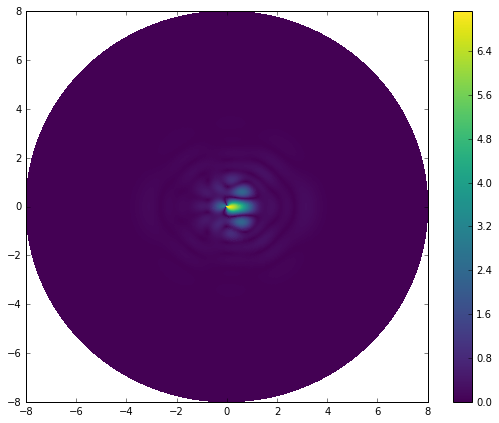

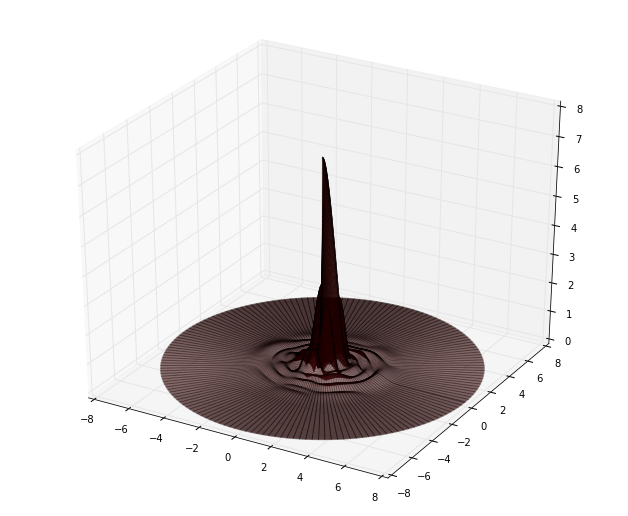

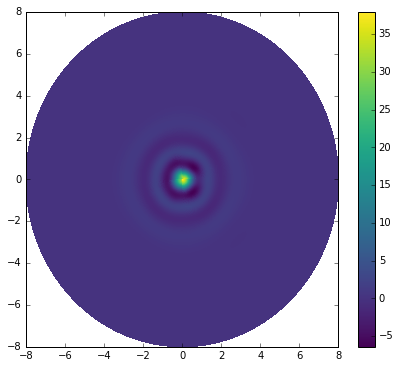

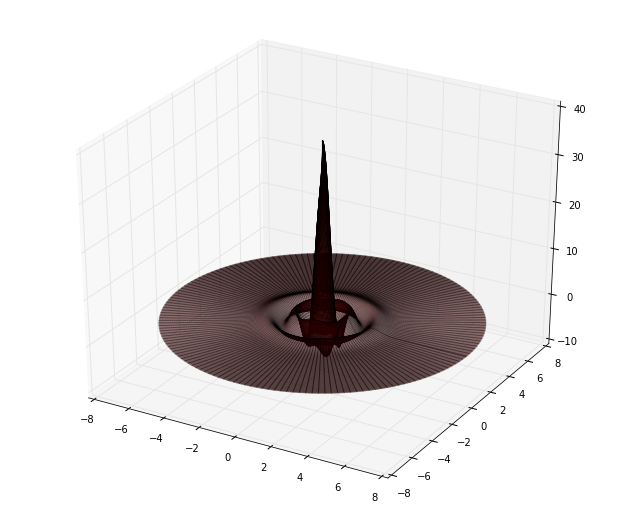

In [14]:


'''plots'''
save=False #set True if i want to save files automatically
R, P = np.meshgrid(rho, phi)
X, Y = R*np.cos(P), R*np.sin(P)


fig, (ax0) = plt.subplots(ncols=1, figsize=(9, 7))
cs0=ax0.pcolormesh(X, Y, intensity,cmap=plt.get_cmap('viridis'))
plt.colorbar(cs0)
#cs1=ax1.pcolormesh(X, Y, test,cmap=pyplot.get_cmap('viridis'),vmin=np.min(test), vmax=np.max(test))
fig = plt.figure(figsize=(11,9), dpi=100)
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, intensity,  color="red", rstride=3, cstride=4, alpha=0.2)

fig, (ax0) = plt.subplots(ncols=1, figsize=(7, 6))
cs0=ax0.pcolormesh(X, Y, population,cmap=plt.get_cmap('viridis'))
plt.colorbar(cs0)
#cs1=ax1.pcolormesh(X, Y, test,cmap=pyplot.get_cmap('viridis'),vmin=np.min(test), vmax=np.max(test))
fig = plt.figure(figsize=(11,9), dpi=100)
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, population,  color="red", rstride=3, cstride=4, alpha=0.2)





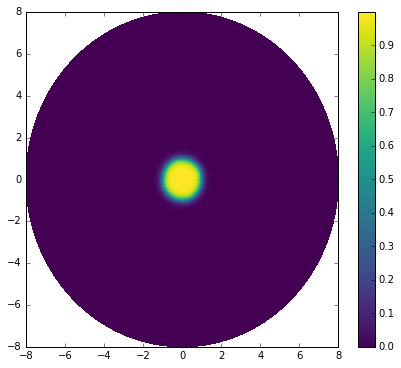

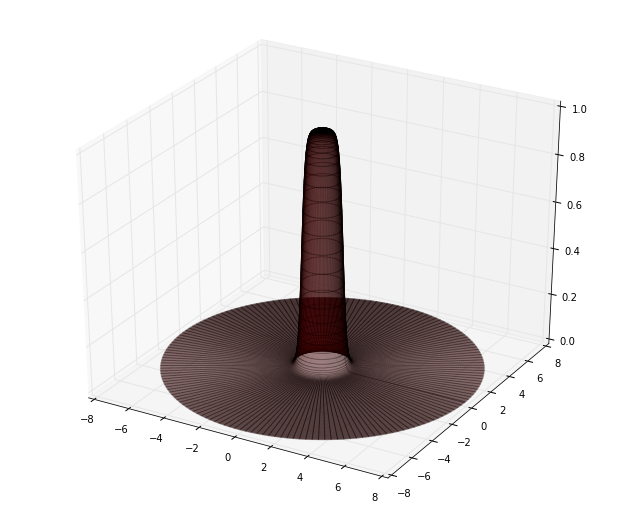

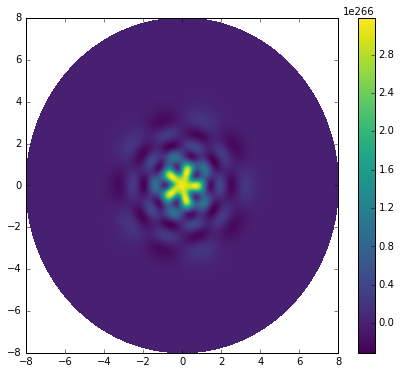

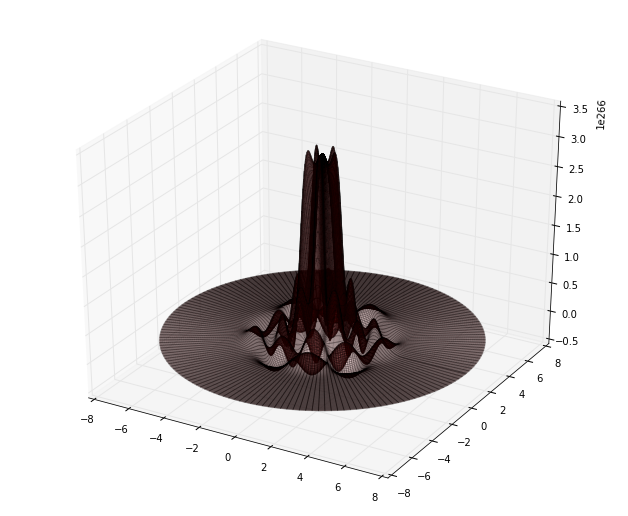

In [18]:
pump=np.fromfile('pump_func.in',dtype=np.float64).reshape(phi_dim,rho_dim)
pump_proy=np.fromfile('pump_proy.in',dtype=np.float64).reshape(phi_dim,rho_dim)

fig, (ax0) = plt.subplots(ncols=1, figsize=(7, 6))
cs0=ax0.pcolormesh(X, Y, pump,cmap=plt.get_cmap('viridis'))
plt.colorbar(cs0)
#cs1=ax1.pcolormesh(X, Y, test,cmap=pyplot.get_cmap('viridis'),vmin=np.min(test), vmax=np.max(test))
fig = plt.figure(figsize=(11,9), dpi=100)
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, pump,  color="red", rstride=3, cstride=4, alpha=0.2)

fig, (ax0) = plt.subplots(ncols=1, figsize=(7, 6))
cs0=ax0.pcolormesh(X, Y, pump_proy,cmap=plt.get_cmap('viridis'))
plt.colorbar(cs0)
#cs1=ax1.pcolormesh(X, Y, test,cmap=pyplot.get_cmap('viridis'),vmin=np.min(test), vmax=np.max(test))
fig = plt.figure(figsize=(11,9), dpi=100)
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, pump_proy,  color="red", rstride=3, cstride=4, alpha=0.2)

5


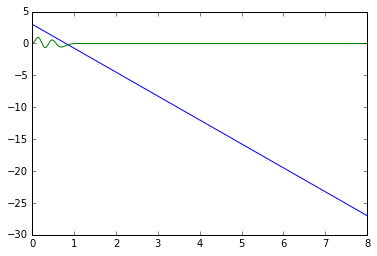

In [16]:
txtfile=open("resolution.txt")
tempvar=txtfile.readlines()

'''resolution'''
m= int(tempvar[0].split()[1])
n= int(tempvar[1].split()[1])
i= int(tempvar[2].split()[1])
print n

rho=np.fromfile('rho.in',dtype=np.float64)
rho_dim=np.shape(rho)[0]
phi=np.fromfile('phi.in',dtype=np.float64)
phi_dim=np.shape(phi)[0]
lm=np.fromfile('lm.in',dtype=np.float64).reshape(n+1,rho_dim)
Rlm=np.fromfile('Rlm.in',dtype=np.float64).reshape(n+1,rho_dim)

#fig, (ax0) = plt.subplots(ncols=1, figsize=(7, 6))
#cs0=ax0.pcolormesh(X, Y, Alm[1,:,:],cmap=plt.get_cmap('viridis'))
#plt.colorbar(cs0)
#cs1=ax1.pcolormesh(X, Y, test,cmap=pyplot.get_cmap('viridis'),vmin=np.min(test), vmax=np.max(test))

#fig = plt.figure(figsize=(11,9), dpi=100)
#ax = plt.subplot(111, projection='3d')
#ax.plot_surface(X, Y, Alm[5,:,:],  color="red", rstride=3, cstride=4, alpha=0.2)

fig5=plt.figure()
#fig5.suptitle('Phase spase Map. Max intensity vs. Wf', fontsize=12, fontweight='bold')
ax1 = fig5.add_subplot(111)
ax1.plot(rho,lm[1,:],'-b')
ax1.plot(rho,Rlm[3,:],'-g')
#ax1.plot([0,max(rho)],[0,0],'-k')
#ax1.set_xlim(0,8)
#ax1.set_ylim(-2,10)

5


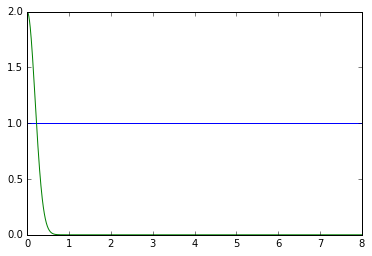

In [17]:
txtfile=open("resolution.txt")
tempvar=txtfile.readlines()

'''resolution'''
m= int(tempvar[0].split()[1])
n= int(tempvar[1].split()[1])
i= int(tempvar[2].split()[1])
print n

rho=np.fromfile('rho.in',dtype=np.float64)
rho_dim=np.shape(rho)[0]
phi=np.fromfile('phi.in',dtype=np.float64)
phi_dim=np.shape(phi)[0]
lm=np.fromfile('lm_alpha.in',dtype=np.float64).reshape(n+1,rho_dim)
Rlm=np.fromfile('Rlm_alpha.in',dtype=np.float64).reshape(n+1,rho_dim)

#fig, (ax0) = plt.subplots(ncols=1, figsize=(7, 6))
#cs0=ax0.pcolormesh(X, Y, Alm[1,:,:],cmap=plt.get_cmap('viridis'))
#plt.colorbar(cs0)
#cs1=ax1.pcolormesh(X, Y, test,cmap=pyplot.get_cmap('viridis'),vmin=np.min(test), vmax=np.max(test))

#fig = plt.figure(figsize=(11,9), dpi=100)
#ax = plt.subplot(111, projection='3d')
#ax.plot_surface(X, Y, Alm[5,:,:],  color="red", rstride=3, cstride=4, alpha=0.2)

fig5=plt.figure()
#fig5.suptitle('Phase spase Map. Max intensity vs. Wf', fontsize=12, fontweight='bold')
ax1 = fig5.add_subplot(111)
ax1.plot(rho,lm[0,:],'-b')
ax1.plot(rho,Rlm[0,:],'-g')
#ax1.plot([0,max(rho)],[0,0],'-k')
#ax1.set_xlim(0,8)
#ax1.set_ylim(-2,10)